In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns",1000)
warnings.filterwarnings("ignore")
%matplotlib inline
import os

In [3]:
os.getcwd()

'C:\\Users\\Monu'

In [4]:
os.chdir("C:/Users/Monu/Desktop/Pandas/HR")

In [105]:
hr_data=pd.read_csv("train.csv",encoding="unicode_escape")
hr_data2=pd.read_csv("test.csv",encoding="unicode_escape")

In [6]:
hr1=hr_data.append(hr_data2)

In [7]:
hr_data.shape


(54808, 14)

In [8]:
hr1.shape

(78298, 14)

In [9]:
hr1.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298,78298,74855,78298,78298,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24155,17642,52247,55092,43524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39149.500000,NaN,NaN,NaN,NaN,NaN,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,NaN,NaN,NaN,NaN,NaN,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


findout and fill null values

In [10]:
# Find null values
hr1.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [11]:
hr1['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

observation:Education is not used to determine the promotion.Drop the coloumn.

In [12]:
hr1.drop(['education'],axis=1,inplace=True)

In [13]:
hr1.columns

Index(['employee_id', 'department', 'region', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
#Replacing the NaN values in the previous_rating_coloumn with 0.
hr1['previous_year_rating'].fillna(0,inplace = True)

In [15]:
hr1.isnull().sum()

employee_id                 0
department                  0
region                      0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

Uni-Variate Analysis :

In [16]:
hr1['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [17]:
hr1['region'].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

observation : region is not used to determine the promotion.Drop the coloumn.

In [18]:
hr1.drop(['region'],axis=1,inplace=True)

In [19]:
hr1.columns

Index(['employee_id', 'department', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [20]:
hr1['gender'].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [21]:
hr1['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

observation : recruitment_channel is not used to determine the promotion.Drop the coloumn.

In [22]:
hr1.drop(['recruitment_channel'],axis=1,inplace=True)

In [23]:
hr1.columns

Index(['employee_id', 'department', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [24]:
hr1['no_of_trainings'].value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
8         7
9         7
10        5
Name: no_of_trainings, dtype: int64

In [25]:
hr1['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

<AxesSubplot:xlabel='no_of_trainings'>

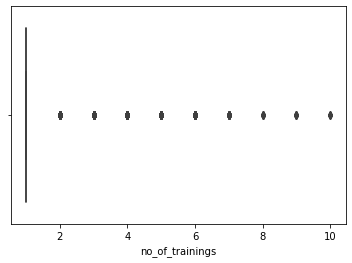

In [26]:
import seaborn as sns
sns.boxplot(hr1.no_of_trainings)

Text(0, 0.5, 'no_of_trainings')

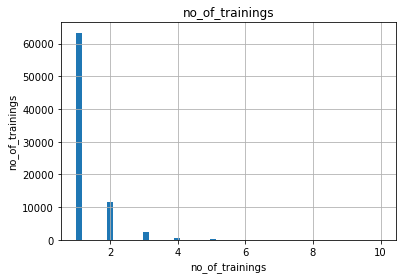

In [27]:
figure=hr1.no_of_trainings.hist(bins=50)
figure.set_title("no_of_trainings")
figure.set_xlabel("no_of_trainings")
figure.set_ylabel("no_of_trainings")

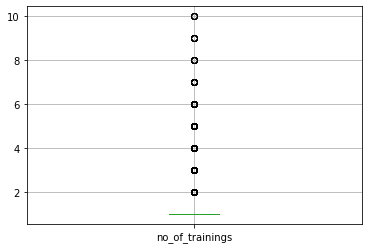

In [28]:
figure=hr1.boxplot(column="no_of_trainings")

In [29]:
#### Intetquantile range to calculate the boundaries

IQR=hr1.no_of_trainings.quantile(0.75)-hr1.no_of_trainings.quantile(0.25)

In [30]:
IQR


0.0

In [31]:
### Extreme outliers
lower_bridge=hr1["no_of_trainings"].quantile(0.25)-(IQR*3)
upper_bridge=hr1["no_of_trainings"].quantile(0.75)+(IQR*3)

In [32]:
lower_bridge


1.0

In [33]:
upper_bridge

1.0

In [34]:
hr1['age'].value_counts()

30    5260
31    5060
32    5015
29    4861
33    4597
28    4509
34    4397
27    4061
35    3880
36    3539
37    3064
26    2917
38    2785
39    2446
40    2338
25    1885
41    1874
42    1624
43    1427
44    1203
24    1181
45    1063
46     974
47     813
48     777
50     726
49     650
23     642
51     550
53     518
52     518
54     452
55     429
56     385
57     333
22     329
58     317
60     306
59     292
20     164
21     137
Name: age, dtype: int64

<AxesSubplot:xlabel='age'>

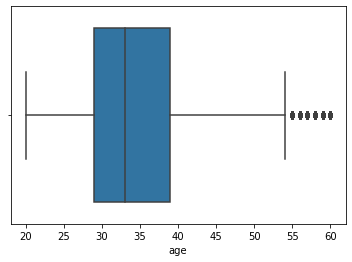

In [35]:
sns.boxplot(hr1.age)

In [36]:
### sigma rule(Gaussion Distribution we will calculate the boundaries which differentiates the outliers)
upper_boundary=hr1["age"].mean()+3*hr1["age"].std()
lower_boundary=hr1["age"].mean()-3*hr1["age"].std()

In [37]:
upper_boundary

57.79540379175127

In [38]:
lower_boundary

11.799834911663893

In [39]:
#### Intetquantile range to calculate the boundaries
IQR=hr1.age.quantile(0.75)-hr1.age.quantile(0.25)

In [40]:
lower_bridge=hr1["age"].quantile(0.25)-(IQR*1.5)
upper_bridge=hr1["age"].quantile(0.75)+(IQR*1.5)

In [41]:
lower_bridge

14.0

In [42]:
upper_bridge

54.0

In [43]:
data=hr1.copy()

In [44]:
data.loc[data["age"]>54,"age"]=54

In [45]:
data.head(10)

,employee_id,department,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,f,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,m,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,m,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,m,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,m,1,45,3.0,2,0,0,73,0.0
5,58896,Analytics,m,2,31,3.0,7,0,0,85,0.0
6,20379,Operations,f,1,31,3.0,5,0,0,59,0.0
7,16290,Operations,m,1,33,3.0,6,0,0,63,0.0
8,73202,Analytics,m,1,28,4.0,5,0,0,83,0.0
9,28911,Sales & Marketing,m,1,32,5.0,5,1,0,54,0.0


In [46]:
data['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0.0     5936
Name: previous_year_rating, dtype: int64

<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

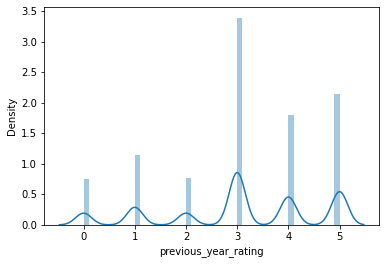

In [47]:
sns.distplot(data.previous_year_rating)

In [48]:
data['length_of_service'].value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
26       55
27       52
28       42
29       40
31       27
30       18
32       11
33       10
34        6
37        1
Name: length_of_service, dtype: int64

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

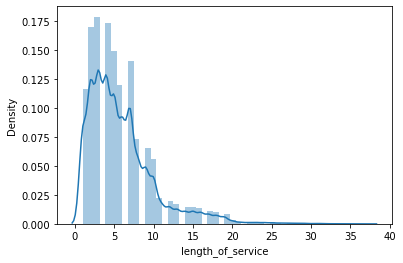

In [49]:
sns.distplot(data.length_of_service)

<AxesSubplot:xlabel='length_of_service'>

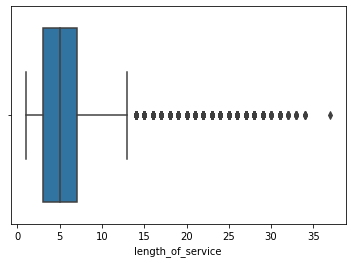

In [50]:
sns.boxplot(data.length_of_service)

In [51]:
#### Intetquantile range to calculate the boundaries

IQR=data.length_of_service.quantile(0.75)-data.length_of_service.quantile(0.25)

In [52]:
### Extreme outliers
lower_bridge=data["length_of_service"].quantile(0.25)-(IQR*3)
upper_bridge=data["length_of_service"].quantile(0.75)+(IQR*3)

In [53]:
lower_bridge

-9.0

In [54]:
upper_bridge

19.0

In [55]:
data.loc[data["length_of_service"]>19,"length_of_service"]=19

<AxesSubplot:xlabel='length_of_service'>

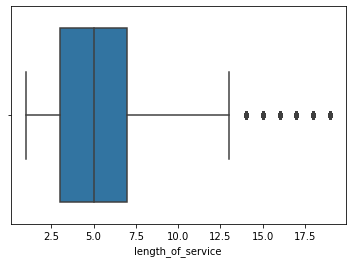

In [56]:
sns.boxplot(data.length_of_service)

In [57]:
data['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [58]:
data['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [59]:
data['avg_training_score'].value_counts()

50    3943
49    3825
48    3521
51    3370
60    3044
      ... 
98      51
99      48
41      37
40       8
39       3
Name: avg_training_score, Length: 61, dtype: int64

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

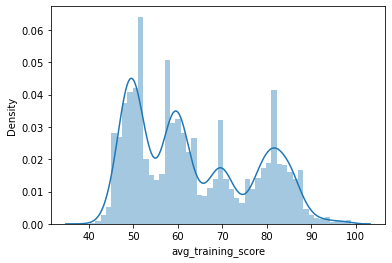

In [60]:
sns.distplot(data.avg_training_score)

<AxesSubplot:xlabel='avg_training_score'>

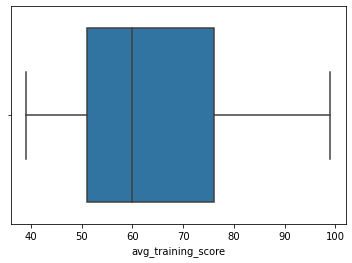

In [61]:
sns.boxplot(data.avg_training_score)

In [62]:
# checkig the no. of Employees Promoted
# hr['is_promoted'].value_counts(normalize=True)
data['is_promoted'].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [63]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


In [64]:
data.columns

Index(['employee_id', 'department', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [65]:
data1=pd.get_dummies(data,drop_first=True)

In [66]:
data1.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'gender_m'],
      dtype='object')

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   no_of_trainings               78298 non-null  int64  
 2   age                           78298 non-null  int64  
 3   previous_year_rating          78298 non-null  float64
 4   length_of_service             78298 non-null  int64  
 5   KPIs_met >80%                 78298 non-null  int64  
 6   awards_won?                   78298 non-null  int64  
 7   avg_training_score            78298 non-null  int64  
 8   is_promoted                   54808 non-null  float64
 9   department_Finance            78298 non-null  uint8  
 10  department_HR                 78298 non-null  uint8  
 11  department_Legal              78298 non-null  uint8  
 12  department_Operations         78298 non-null  uint8  
 13  d

In [68]:
### convert object into integers
data1["department_Finance"]=data1["department_Finance"].astype(int)
data1["department_HR"]=data1["department_HR"].astype(int)
data1["department_Legal"]=data1["department_Legal"].astype(int)
data1["department_Operations"]=data1["department_Operations"].astype(int)
data1["department_Procurement"]=data1["department_Procurement"].astype(int)
data1["department_R&D"]=data1["department_R&D"].astype(int)
data1["department_Sales & Marketing"]=data1["department_Sales & Marketing"].astype(int)
data1["department_Technology"]=data1["department_Technology"].astype(int)

data1["gender_m "]=data1["gender_m"].astype(int)

In [69]:
data1.isnull().sum()

employee_id                         0
no_of_trainings                     0
age                                 0
previous_year_rating                0
length_of_service                   0
KPIs_met >80%                       0
awards_won?                         0
avg_training_score                  0
is_promoted                     23490
department_Finance                  0
department_HR                       0
department_Legal                    0
department_Operations               0
department_Procurement              0
department_R&D                      0
department_Sales & Marketing        0
department_Technology               0
gender_m                            0
gender_m                            0
dtype: int64

In [70]:
data1.shape

(78298, 19)

In [71]:
test_cl=data1[data1['is_promoted'].isnull()]
train_cl=data1[data1['is_promoted'].notnull()]

In [72]:
print(test_cl.shape)
print(train_cl.shape)

(23490, 19)
(54808, 19)


In [73]:
train_y=train_cl['is_promoted']
train_x=train_cl.drop('is_promoted',axis=1)
test_x=test_cl.drop('is_promoted',axis=1)
y_test=test_cl['is_promoted']

In [74]:
train_y.shape,train_x.shape,test_x.shape,y_test.shape

((54808,), (54808, 18), (23490, 18), (23490,))

Model1: Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(train_x,train_y)

LogisticRegression()

In [76]:
model1.coef_

array([[-6.62289584e-06, -1.82653790e-01, -1.21895461e-01,
         3.46402870e-01,  7.20026324e-02,  3.26690416e-01,
         1.04086663e-01,  1.13306824e-02, -1.19206357e-02,
        -1.47181914e-02, -8.47165355e-03,  1.97331474e-02,
         5.56178177e-03, -1.24826727e-02, -1.44456986e-02,
        -6.13524121e-03, -7.52715828e-02, -7.52715828e-02]])

In [77]:
model1.intercept_

array([-0.09021413])

In [78]:
# coef_data=pd.DataFrame(model1.coef_, train_x.columns, columns=['Coefficient'])
# coef_data

In [79]:
test_cl.isnull().sum()

employee_id                         0
no_of_trainings                     0
age                                 0
previous_year_rating                0
length_of_service                   0
KPIs_met >80%                       0
awards_won?                         0
avg_training_score                  0
is_promoted                     23490
department_Finance                  0
department_HR                       0
department_Legal                    0
department_Operations               0
department_Procurement              0
department_R&D                      0
department_Sales & Marketing        0
department_Technology               0
gender_m                            0
gender_m                            0
dtype: int64

In [80]:
model1_pred=model1.predict(test_x)

In [81]:
model1_pred

array([0., 0., 0., ..., 0., 0., 0.])

Model 2: Decission tree classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(train_x,train_y)

DecisionTreeClassifier()

In [84]:
# Make prediction on test data
model2_pred=model2.predict(test_x)

In [85]:
model2_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [86]:
model2_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [87]:
test_find=data[data1['is_promoted'].isnull()]

In [88]:
test_find

,employee_id,department,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,m,1,24,0.0,1,1,0,77,NaN
1,74430,HR,f,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,m,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,f,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,m,1,30,4.0,7,0,0,61,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,m,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,m,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,f,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,m,3,27,0.0,1,0,0,70,NaN


In [89]:
test_find=hr_data2[["employee_id"]]

In [90]:
data_pred=pd.concat([test_find,pd.DataFrame(model2_pred)],axis=1)

In [91]:
data_pred

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,1.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [92]:
data_pred.to_csv("hr.csv",index=False)

Model 3: Random Forest classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=20,random_state=0)
model3.fit(train_x,train_y)
model3_pred=model3.predict(test_x)

In [102]:
model3_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [103]:
# # Evaluating the algorithm
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# # 
# print(confusion_matrix(y_test,y_pred1))

In [107]:
data_pred1=pd.concat([test_find,pd.DataFrame(y_pred1)],axis=1)

NameError: name 'y_pred1' is not defined

In [97]:
data_pred1

NameError: name 'data_pred1' is not defined

Model 3: Random Forest classifier=25

In [108]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=15,random_state=0)
regressor.fit(train_x,train_y)
y_pred2=regressor.predict(test_x)

In [109]:
y_pred2

array([0., 0., 0., ..., 0., 0., 1.])

In [110]:
data_pred2=pd.concat([test_find,pd.DataFrame(y_pred2)],axis=1)

In [111]:
data_pred2

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [112]:
data_pred.to_csv("randforest18_pred.csv",index=False)

Model 4-KNN Algoritham

In [113]:
from sklearn.neighbors import KNeighborsRegressor
>>> knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [114]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(test_x)

In [115]:
train_preds

array([0.        , 0.        , 0.        , ..., 0.33333333, 0.33333333,
       0.33333333])

In [116]:
knn_pred1=pd.concat([test_find,round(pd.DataFrame(train_preds),1)],axis=1)

In [117]:
knn_pred1

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.7
4,64486,0.3
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.3
23488,1186,0.3


In [118]:
knn_pred1.to_csv("knn_pred1.csv",index=False)

model 4 :Naivy baiyes

In [119]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(train_x, train_y)

In [120]:
y_pred2=nb.predict(test_x)

In [121]:
y_pred2

array([0., 0., 0., ..., 0., 0., 0.])

In [122]:
nb_pred1=pd.concat([test_find,round(pd.DataFrame(y_pred2),1)],axis=1)

In [123]:
nb_pred1

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [124]:
nb_pred1.to_csv("nb_pred1.csv",index=False)

VotingClassifier

In [125]:
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=[('lr',model1),('dt',model2),('rf',model3)],voting='hard')
model.fit(train_x, train_y)
# model.score(test_x,y_test)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(n_estimators=20,
                                                     random_state=0))])

In [126]:
final_pred2=model.predict(test_x)

In [127]:
final_pred2

array([0., 0., 0., ..., 0., 0., 1.])

In [128]:
voting_pred1=pd.concat([test_find,round(pd.DataFrame(final_pred2),1)],axis=1)

In [129]:
voting_pred1

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [130]:
voting_pred1.to_csv("voting_pred1.csv",index=False)

In [131]:
from sklearn.tree import DecisionTreeClassifier
modell1=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
modell2=RandomForestClassifier(n_estimators=15,random_state=0)

modell3=LogisticRegression()

In [132]:
modell3.fit(train_x,train_y)

LogisticRegression()

In [134]:
modell2.fit(train_x,train_y)

RandomForestClassifier(n_estimators=15, random_state=0)

In [135]:
modell1.fit(train_x,train_y)

DecisionTreeClassifier()

In [136]:
pred1=modell1.predict(test_x)
# pred2=modell2.predict(test_x)
# pred3=modell3.predict(test_x)

In [137]:
pred2=modell2.predict(test_x)

In [138]:
pred3=modell3.predict(test_x)

In [139]:
from statistics import mode

In [140]:
final_predll=np.array([])
for i in range(0,len(test_x)):
    final_predll=np.append(final_predll,mode([pred1[i],pred2[i],pred3[i]]))

In [141]:
final_predll

array([0., 0., 0., ..., 0., 0., 1.])

In [142]:
finalll_pred=pd.concat([test_find,round(pd.DataFrame(final_predll),1)],axis=1)

In [143]:
finalll_pred

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [145]:
finalll_pred.to_csv("finalll_pred.csv",index=False)

In [146]:
final_predll3=np.array([])
for i in range(0,len(test_x)):
    final_predll3=np.append(final_predll,mode([pred1[i],pred2[i]]))

In [147]:
final_predll3

array([0., 0., 0., ..., 0., 1., 1.])

In [148]:
final_predll3=pd.concat([test_find,round(pd.DataFrame(final_predll3),1)],axis=1)

In [149]:
final_predll3

,employee_id,0
0,8724.0,0.0
1,74430.0,0.0
2,72255.0,0.0
3,38562.0,0.0
4,64486.0,0.0
...,...,...
23486,25600.0,0.0
23487,45409.0,0.0
23488,1186.0,0.0
23489,5973.0,1.0


In [150]:
final_predll3.to_csv("final_predll4.csv",index=False)

In [151]:
hr_data2.shape

(23490, 13)

In [152]:
# yft=final_predll3.drop(23490,inplace = True)

Adaboost

In [153]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=1)
model.fit(train_x,train_y)

AdaBoostClassifier(random_state=1)

In [154]:
Adaboost=model.predict(test_x)

In [155]:
Adaboost

array([0., 0., 0., ..., 0., 0., 0.])

In [156]:
Adaboost_Prd=pd.concat([test_find,round(pd.DataFrame(Adaboost),1)],axis=1)

In [157]:
Adaboost_Prd

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [158]:
test_x.shape

(23490, 18)

In [159]:
test_find.shape

(23490, 1)

In [160]:
Adaboost_Prd.to_csv("Adaboost_Prd.csv",index=False)

model : GradientBoostingClassifier

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
model1=GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model1.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [162]:
grad=model1.predict(test_x)

In [163]:
grad

array([0., 0., 0., ..., 0., 0., 0.])

In [164]:
grad=pd.concat([test_find,round(pd.DataFrame(grad),1)],axis=1)

In [165]:
grad

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [166]:
grad.to_csv("grad.csv",index=False)

xgboost

In [167]:
import xgboost as xg

In [168]:
model_xg=xg.XGBClassifier(learning_rate=0.01,random_state=1)

In [169]:
model_xg.fit(train_x,train_y)

[16:03:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
model_xgb=model_xg.predict(test_x)

In [171]:
model_xgb

array([0., 0., 0., ..., 0., 0., 0.])

In [172]:
model_xgb=pd.concat([test_find,round(pd.DataFrame(model_xgb),1)],axis=1)

In [173]:
model_xgb

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [174]:
model_xgb.to_csv("model_xgb.csv",index=False)

In [175]:
import xgboost as xg
parameters={"learning_rate":[0.01,0.1,0.2,0.3],
           "n_estimators":[10,20,30,40,50,75,100,150,200],
           "n_jobs":[2,6,8,10],
           'max_depth':[4,6,8,10]
#            "random_state":[0]
           }

In [176]:
model=xg.XGBClassifier(random_state=0)

In [177]:
from sklearn.model_selection import GridSearchCV
GS_XG=GridSearchCV(estimator=model,
                  param_grid=parameters,
                  cv=10,
                  n_jobs=-1)

GS_XG.fit(train_x,train_y)

[18:31:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=N

In [178]:
xg=GS_XG.predict(test_x)

In [179]:
xg

array([0., 0., 0., ..., 0., 0., 1.])

In [180]:
xg=pd.concat([test_find,round(pd.DataFrame(xg),1)],axis=1)

In [181]:
xg

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [182]:
xg.to_csv("xg1.csv",index=False)